In [1]:
# Programming Assignment 2

In [3]:
# image processing 
#import required libraries 

import os
from skimage import io,color,exposure,filters
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

#ref : frst assignment question based 

def angle(dx, dy):
 """Calculate the angles between horizontal and vertical operators."""
 return np.mod(np.arctan2(dy, dx), np.pi)

direct = 'cropped'
breeds=os.listdir(direct)

images = []
dog_breed = []


for index,breed in enumerate(breeds):
    img_path = os.path.join(direct, breed)
    for image in os.listdir(img_path):
            src_path = os.path.join(img_path, image)
            img = io.imread(src_path)
            img = color.rgb2gray(img)
            img = angle(filters.sobel_h(img),filters.sobel_v(img))
            hist,_=exposure.histogram(img, nbins=36)
            images.append(hist)
            dog_breed.append(index)
           
    
images=np.array(images)
dog_breed=np.array(dog_breed)
    

In [4]:
#getting data ready for part 6 
#normalising data
#import req libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(images, dog_breed, test_size=0.2,stratify=dog_breed, random_state=42)

scaler = StandardScaler()
dog_train_images= scaler.fit_transform(X_train)

dog_test_images=scaler.transform(X_test)

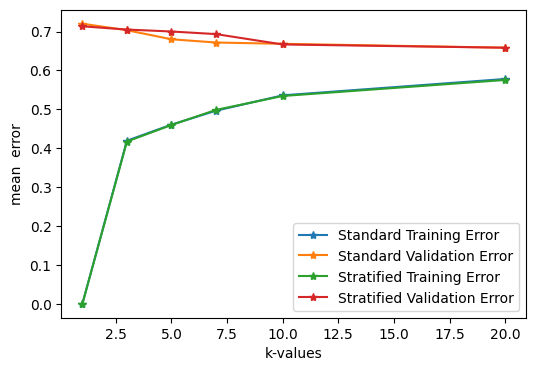

In [5]:
# selection of stratified model with lowest error 
# import req libraries
from sklearn.model_selection import StratifiedKFold ,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# given k values 1,3,5,7,10,20



# define a function that takes input of model and results error at each k

def get_errors(model):
    te=[]
    ve =[]
    for k in [1,3,5,7,10,20]:
        KNN_clf = KNeighborsClassifier(n_neighbors=k)
        t=[]
        v = []
        for t_index, v_index in model.split(dog_train_images, y_train):
            Xtrain, Xval = dog_train_images[t_index], dog_train_images[v_index]
            Ytrain, Yval = y_train[t_index], y_train[v_index]
            KNN_clf.fit(Xtrain, Ytrain)
            t_pred = KNN_clf.predict(Xtrain)
            v_pred = KNN_clf.predict(Xval)
            t_acc = accuracy_score(Ytrain, t_pred)
            v_acc = accuracy_score(Yval, v_pred)
            t.append(1-t_acc)
            v.append(1-v_acc)
        te.append(np.mean(t))
        ve.append(np.mean(v))
    return te,ve

#iniatising our models
model1=KFold(n_splits=5)
model2=StratifiedKFold(n_splits=5)

te1,ve1=get_errors(model1)
te2,ve2=get_errors(model2)

#plot the diagram to show the error curves

plt.figure(figsize=(6, 4))
plt.plot([1,3,5,7,10,20], te1, label='Standard Training Error',marker='*')
plt.plot([1,3,5,7,10,20], ve1, label='Standard Validation Error',marker='*')
plt.plot([1,3,5,7,10,20], te2, label='Stratified Training Error',marker='*')
plt.plot([1,3,5,7,10,20], ve2, label='Stratified Validation Error',marker='*')
plt.xlabel('k-values')
plt.ylabel('mean  error')
plt.legend()
plt.show()

In [8]:
# lowest mean error for each curve : 'Standard Training Error' at k = 0 ,
#'Standard Validation Error' at k =0 ,'Stratified Training Error' at k =20 ,Stratified Validation Error' at k =20

In [9]:
# high complexity at k = 20 intermediate at k = 3,5,7,10 and low at k= 1

In [10]:
# model overfits at k = 1 since less neighbors and we see in diagram more validation error and less training error

In [11]:
# model underfits at k= 20 since more neighbors and we see more training error and also validation error does not decrease as needed.

In [19]:
#Test error at k = 20 
KNN=KNeighborsClassifier(20)
KNN.fit(dog_train_images, y_train)
pred = KNN.predict(dog_test_images)
test_acc = accuracy_score(y_test, pred)
test_error = 1-test_acc 
print(test_error)

0.7152317880794702


MLPClassifier(hidden_layer_sizes=(10, 10, 10))

mean validation accuracy : 0.315
TestAccuracy : 0.33112582781456956
f1Score : 0.3257962832965378


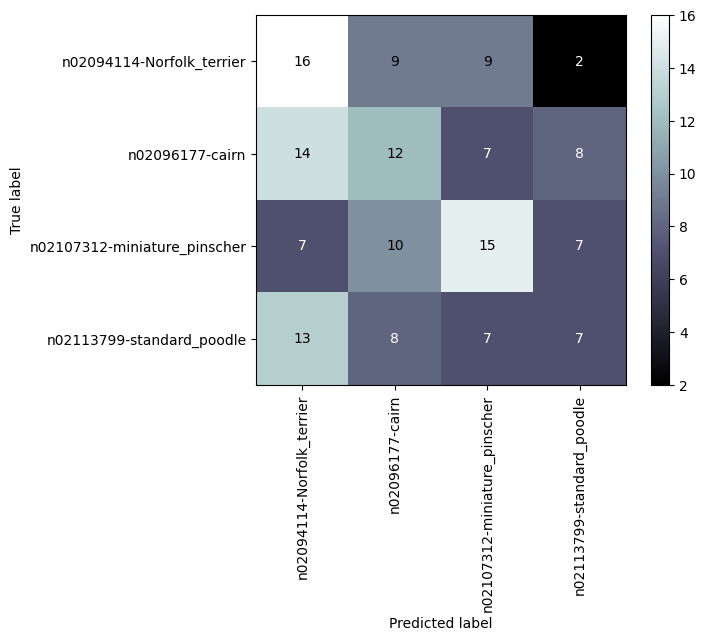

GaussianNB()

mean validation accuracy : 0.3016666666666667
TestAccuracy : 0.2847682119205298
f1Score : 0.2683006945617316


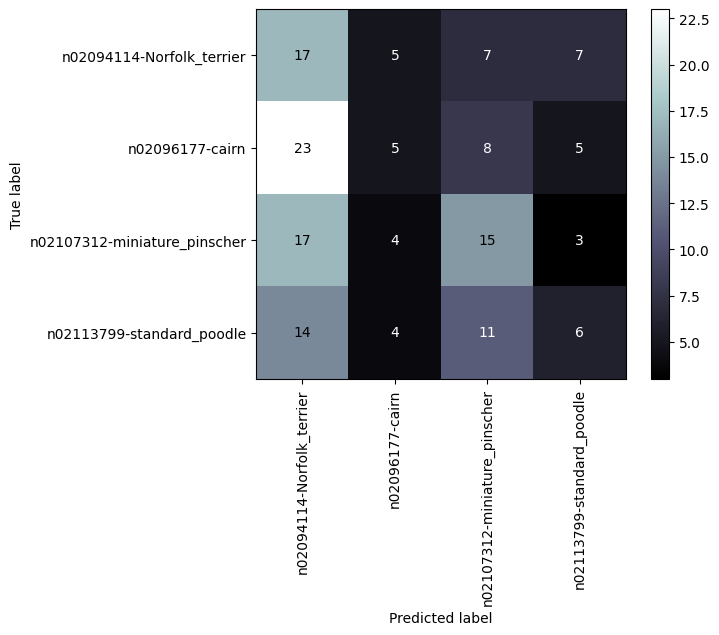

RandomForestClassifier()

mean validation accuracy : 0.34500000000000003
TestAccuracy : 0.32450331125827814
f1Score : 0.3070678679603676


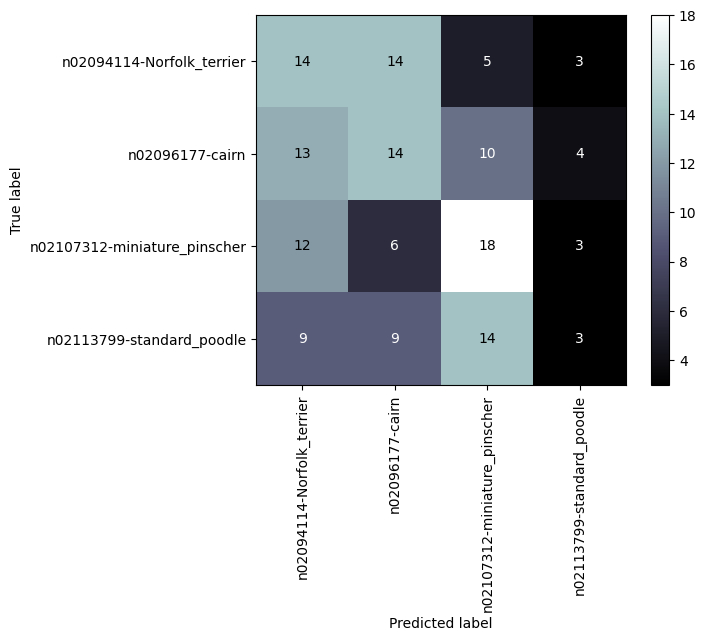

In [25]:
# assigned 3 classifiers see the performance of them by plotting confusion matrix, and compare, accuracies, f1scores.
#import req libraries

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay


for clf in [MLPClassifier(hidden_layer_sizes=(10,10,10)),GaussianNB(),RandomForestClassifier()]:
    t=[]
    p=[]
    matrix=[]
    val_acc=[]
    for t_index, v_index in model2.split(dog_train_images, y_train):
        Xtrain, Xval = dog_train_images[t_index], dog_train_images[v_index]
        Ytrain, Yval = y_train[t_index], y_train[v_index]
        
        clf.fit(Xtrain, Ytrain)
        pred= clf.predict(Xval)
        t.extend(Yval)
        p.extend(pred)
      
        val = accuracy_score(Yval, pred)
        val_acc.append(val)
    print(str(clf) + "\n") 
    clf.fit(dog_train_images,y_train)
    preds=clf.predict(dog_test_images)
    print("mean validation accuracy : "+str(np.mean(val_acc)))
    t_acc = accuracy_score(y_test, preds)
    print("TestAccuracy : "+str(t_acc))
    f1 = f1_score(y_test, preds, average='weighted')
    print("f1Score : "+str(f1))
    matrix.append(confusion_matrix(y_test,preds))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = sum(matrix)/len(matrix), display_labels =breeds
 )
    cm_display.plot(xticks_rotation=90,cmap=plt.cm.bone)
    plt.show()

In [23]:
# Random forest performs best on all performance metrics.

in plot we see that the numbers in diagonal of randomforest are greater than other model diagonal .  since it classsifies better.